## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [1]:
# 1 字典表示法 （效率较高）
import json

# 读取JSON数据
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

# 提取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 构建社交关系网络的字典表示 (1.a要求)
network = {}

# 初始化每个用户的直接朋友列表
for node in nodes:
    user = node[0]
    network[user] = []

# 填充每个用户的直接朋友列表
for edge in edges:
    user1, user2, weight = edge
    network[user1].append((user2, weight))
    network[user2].append((user1, weight))

# 打印每个用户的直接朋友列表 （1.b要求）
for user, friends in network.items():
    print(f"{user}的直接朋友: {[friend[0] for friend in friends]}")


Yanyan-Wang的直接朋友: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998的直接朋友: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvonney

In [2]:
# 1 邻接矩阵法  (效率较低)
import json
import numpy as np

# 读取JSON数据
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

# 提取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 创建用户名称到索引的映射
user_to_index = {node[0]: idx for idx, node in enumerate(nodes)}
index_to_user = {idx: node[0] for idx, node in enumerate(nodes)}

# 初始化邻接矩阵 （1.a要求）
n = len(nodes)
adj_matrix = np.zeros((n, n))

# 填充邻接矩阵
for edge in edges:
    user1, user2, weight = edge
    i, j = user_to_index[user1], user_to_index[user2]
    adj_matrix[i][j] = weight
    adj_matrix[j][i] = weight  # 无向图

# 找出每个用户的直接朋友
direct_friends = {}
for i in range(n):
    user = index_to_user[i]
    friends = []
    for j in range(n):
        if adj_matrix[i][j] > 0:
            friends.append(index_to_user[j])
    direct_friends[user] = friends

# 打印每个用户的直接朋友列表 (1.b要求)
for user, friends in direct_friends.items():
    print(f"{user}的直接朋友: {friends}")




Yanyan-Wang的直接朋友: ['Aarebecca', 'pomelo-nwu', 'tyn1998', 'frank-zsy', 'andyhuang18', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923']
Aarebecca的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'tyn1998', 'frank-zsy', 'yangzy0603', 'lidongze0629', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923']
pomelo-nwu的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'tyn1998', 'frank-zsy', 'will-ww', 'zhicheng-ning', 'xgdyp', 'andyhuang18', 'Zzzzzhuzhiwei', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'PureNatural', 'birdflyi', 'lhbvvvvv', 'xiaoya-yaya', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923', 'zhaosj975', 'longyanz']
tyn1998的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'pomelo-nwu', 'frank-zsy', 'will-ww', 'zhicheng-ning', 'xgdyp', 'stevending1st', 'andyhuang18', 'Zzzzzhuzhiwei', 'wxharry', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'PureNatural', 'kunal8411', 'birdflyi', 'lhbvvvvv', 'xiaoya-yaya', 'stealth-bom

In [3]:
# 2. 计算每个用户的度数和影响力分数
import json
import numpy as np

# 读取JSON数据
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

# 提取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 创建用户名称到索引的映射
user_to_index = {node[0]: idx for idx, node in enumerate(nodes)}
index_to_user = {idx: node[0] for idx, node in enumerate(nodes)}

# 初始化邻接矩阵
n = len(nodes)
adj_matrix = np.zeros((n, n))

# 填充邻接矩阵
for edge in edges:
    user1, user2, weight = edge
    i, j = user_to_index[user1], user_to_index[user2]
    adj_matrix[i][j] = weight
    adj_matrix[j][i] = weight  # 无向图

# 计算每个用户的度数（直接朋友数量）
degree = {}
for i in range(n):
    user = index_to_user[i]
    degree[user] = np.sum(adj_matrix[i] > 0)

# 找出度数最高的前5个用户及其朋友数量
top_5_degree_users = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最高的前5个用户及其朋友数量:")
for user, count in top_5_degree_users:
    print(f"{user}: {count} 个朋友")

# 计算每个用户的影响力分数
influence = {node[0]: node[1] for node in nodes}

# 找出影响力最高的前5个用户
top_5_influence_users = sorted(influence.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n影响力最高的前5个用户:")
for user, score in top_5_influence_users:
    print(f"{user}: 影响力分数 {score}")

# 综合考虑影响力分数和朋友数量，计算综合得分
combined_score = {}
for user in degree:
    combined_score[user] = 0.5 * degree[user] + 0.5 * influence[user]

# 找出综合得分最高的用户
top_combined_users = sorted(combined_score.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n综合考虑影响力分数和朋友数量的前5个用户:")
for user, score in top_combined_users:
    print(f"{user}: 综合得分 {score}")




度数最高的前5个用户及其朋友数量:
tyn1998: 30 个朋友
frank-zsy: 30 个朋友
pomelo-nwu: 24 个朋友
andyhuang18: 23 个朋友
wj23027: 23 个朋友

影响力最高的前5个用户:
Yanyan-Wang: 影响力分数 50.95
Aarebecca: 影响力分数 23.82
pomelo-nwu: 影响力分数 22.36
tyn1998: 影响力分数 16.64
frank-zsy: 影响力分数 15.8

综合考虑影响力分数和朋友数量的前5个用户:
Yanyan-Wang: 综合得分 32.475
tyn1998: 综合得分 23.32
pomelo-nwu: 综合得分 23.18
frank-zsy: 综合得分 22.9
Aarebecca: 综合得分 17.41


In [5]:
# 3
import json
import numpy as np

# 读取JSON数据
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

# 提取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 创建用户名称到索引的映射
user_to_index = {node[0]: idx for idx, node in enumerate(nodes)}
index_to_user = {idx: node[0] for idx, node in enumerate(nodes)}

# 初始化邻接矩阵
n = len(nodes)
adj_matrix = np.zeros((n, n))

# 填充邻接矩阵
for edge in edges:
    user1, user2, weight = edge
    i, j = user_to_index[user1], user_to_index[user2]
    adj_matrix[i][j] = weight
    adj_matrix[j][i] = weight  # 无向图

# 找出用户 "Yanyan-Wang" 的直接朋友
target_user = "Yanyan-Wang"
target_index = user_to_index[target_user]
direct_friends = [index_to_user[i] for i in range(n) if adj_matrix[target_index][i] > 0]

# 找出 "Yanyan-Wang" 的“朋友的朋友”中最有可能成为新朋友的用户
friends_of_friends = {}
for friend in direct_friends:
    friend_index = user_to_index[friend]
    for i in range(n):
        if adj_matrix[friend_index][i] > 0 and index_to_user[i] != target_user and index_to_user[i] not in direct_friends:
            if index_to_user[i] not in friends_of_friends:
                friends_of_friends[index_to_user[i]] = 0
            friends_of_friends[index_to_user[i]] += 1

# 按共同朋友数量排序
recommended_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)

print(f"推荐给 {target_user} 的新朋友（基于共同朋友数量）:")
for user, common_friends_count in recommended_friends:
    print(f"{user}: {common_friends_count} 个共同朋友")

# 考虑用户之间的连接强度，找出与 "Yanyan-Wang" 连接强度最高的5个用户
connection_strength = {}
for i in range(n):
    if i != target_index:
        connection_strength[index_to_user[i]] = adj_matrix[target_index][i]

top_5_connections = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\n与 {target_user} 连接强度最高的5个用户:")
for user, strength in top_5_connections:
    print(f"{user}: 连接强度 {strength}")

# 输出示例
# 推荐给 Yanyan-Wang 的新朋友（基于共同朋友数量）:
# 用户X: 2 个共同朋友
# 用户Y: 1 个共同朋友
# ...

# 与 Yanyan-Wang 连接强度最高的5个用户:
# 用户A: 连接强度 30.5
# 用户B: 连接强度 25.3
# ...


推荐给 Yanyan-Wang 的新朋友（基于共同朋友数量）:
will-ww: 6 个共同朋友
zhicheng-ning: 6 个共同朋友
xgdyp: 6 个共同朋友
Zzzzzhuzhiwei: 6 个共同朋友
PureNatural: 6 个共同朋友
birdflyi: 6 个共同朋友
lhbvvvvv: 6 个共同朋友
xiaoya-yaya: 6 个共同朋友
zhaosj975: 6 个共同朋友
longyanz: 6 个共同朋友
stevending1st: 5 个共同朋友
wxharry: 4 个共同朋友
kunal8411: 4 个共同朋友
stealth-bombeer: 4 个共同朋友
pranavshuklaa: 4 个共同朋友
Vlad116: 4 个共同朋友

与 Yanyan-Wang 连接强度最高的5个用户:
Aarebecca: 连接强度 25.3
pomelo-nwu: 连接强度 25.09
yangzy0603: 连接强度 11.85
tyn1998: 连接强度 9.62
yvonneyx: 连接强度 7.39


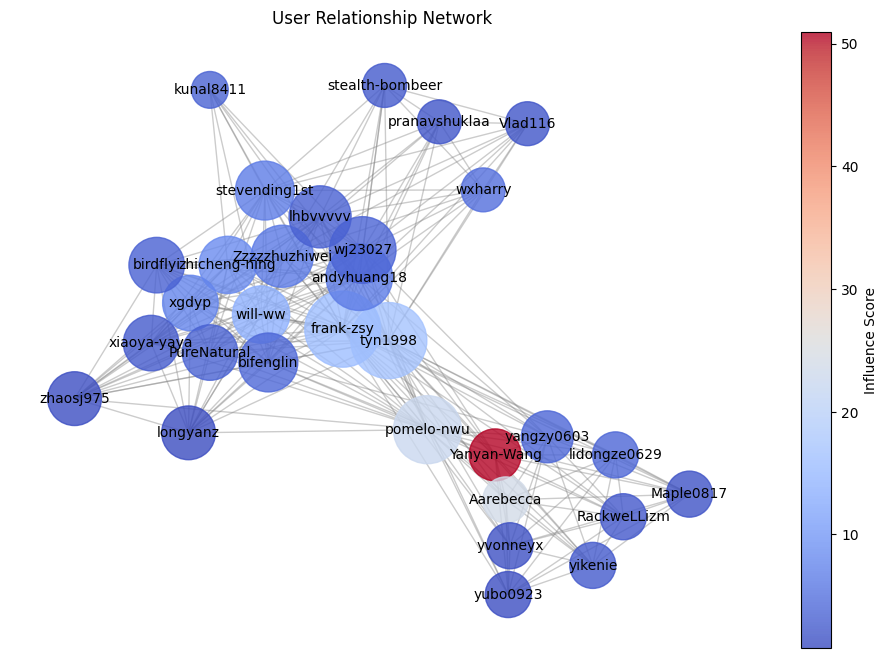

In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 读取JSON数据
with open('hw4_data.json', 'r') as file:
    data = json.load(file)

# 提取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 创建空的无向图
G = nx.Graph()

# 添加节点和边到图中
for node in nodes:
    G.add_node(node[0], influence=node[1])  # 使用影响力得分作为节点属性

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])  # 添加边，带有权重

# 绘制网络图
plt.figure(figsize=(12, 8))

# 提取节点的影响力得分和度数
influence_scores = nx.get_node_attributes(G, 'influence')
degrees = dict(G.degree())

# 根据影响力得分和度数设置节点的颜色和大小
node_color = [influence_scores[node] for node in G.nodes()]
node_size = [degrees[node] * 100 for node in G.nodes()]

# 绘制节点和边
pos = nx.spring_layout(G, seed=42)  # 使用Spring布局算法排列节点
# 绘制节点，返回值将作为颜色条的 mappable
sc = nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.coolwarm, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.4)


# 添加节点的标签
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# 添加颜色条
plt.colorbar(sc, label='Influence Score')

# 设置图形标题
plt.title('User Relationship Network')

# 显示图形
plt.axis('off')
plt.show()
